# Keras

In [1]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential # Sequential NN
from tensorflow.keras.layers import Dense # Dense represents layout in a neural network
import numpy as np #Numpy for array operations
import matplotlib.pyplot as plt # To visualize training process

Using TensorFlow backend.


In [2]:
# To create a neural network that gives twice of input data
x = np.linspace(-1,1,101)  # generate data from 0 to 1
y = 2*x                    # find twice of input data
x.shape                    # shape of input data

(101,)

In [3]:
# add simple layers on sequential model (SNN)
model = Sequential() # Here model is the object of class Sequential

#model.add(Input(101,)) # (101,) is the shape of input
model.add(Dense(1,input_dim=1,activation='linear')) # input_shape=(101,) can also be used inplace of input_dim
# can create more layers using the same code as 'model.add(Dense(...))'
model.add(Dense(1)) # Output layer with only one node; 1 implies relationship with shape of output data,i.e. single dim
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [4]:
# model gives mse as inputted
model.compile('sgd','mse', metrics=['mae','acc']) # mse = mean_squared_error; sgd = stochastic gradient descent
# metrics give the measure of performance of neural network

In [5]:
# model training
history = model.fit(x,y,nb_epoch=100,verbose=1) # higher no of epochs give less error values

Train on 101 samples
Epoch 1/100
101/101 [==============================] - 1s 8ms/sample - loss: 0.1715 - mae: 0.3585 - acc: 0.0198
Epoch 2/100
101/101 [==============================] - 0s 128us/sample - loss: 0.1473 - mae: 0.3326 - acc: 0.0198
Epoch 3/100
101/101 [==============================] - 0s 158us/sample - loss: 0.1237 - mae: 0.3044 - acc: 0.0198
Epoch 4/100
101/101 [==============================] - 0s 128us/sample - loss: 0.1065 - mae: 0.2826 - acc: 0.0198
Epoch 5/100
101/101 [==============================] - 0s 178us/sample - loss: 0.0881 - mae: 0.2568 - acc: 0.0198
Epoch 6/100
101/101 [==============================] - 0s 168us/sample - loss: 0.0736 - mae: 0.2346 - acc: 0.0198
Epoch 7/100
101/101 [==============================] - 0s 138us/sample - loss: 0.0631 - mae: 0.2173 - acc: 0.0198
Epoch 8/100
101/101 [==============================] - 0s 148us/sample - loss: 0.0531 - mae: 0.1994 - acc: 0.0198
Epoch 9/100
101/101 [==============================] - 0s 207us/sampl

dict_keys(['loss', 'mae', 'acc'])


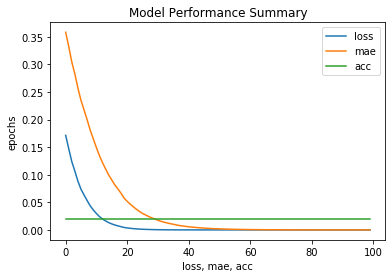

In [6]:
# list all data in history
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['mae'])
plt.plot(history.history['acc'])
plt.title('Model Performance Summary')
plt.legend(['loss','mae','acc'])
plt.xlabel('loss, mae, acc')
plt.ylabel('epochs')
plt.show()

In [7]:
# model testing
# data has to be normalized based on training data
test_x = np.array([1000,100,1200,1900]) / 1900  # divide by max value (data-preprocessing)
test_y = 2*test_x
# test_y = keras.utils.tp_categorical(test_y,num_classes=2)

test = model.evaluate(test_x,test_y)
test

4/1 [========================================================================================================================] - 0s 24ms/sample - loss: 8.6712e-11 - mae: 7.8864e-06 - acc: 0.0000e+00


[8.671247053726461e-11, 7.88644e-06, 0.0]

In [8]:
predict_input = np.linspace(100,201,100)
predictions = model.predict(predict_input)
print(predict_input, predictions)
model.evaluate(predict_input, 2*predict_input)

[100.         101.02020202 102.04040404 103.06060606 104.08080808
 105.1010101  106.12121212 107.14141414 108.16161616 109.18181818
 110.2020202  111.22222222 112.24242424 113.26262626 114.28282828
 115.3030303  116.32323232 117.34343434 118.36363636 119.38383838
 120.4040404  121.42424242 122.44444444 123.46464646 124.48484848
 125.50505051 126.52525253 127.54545455 128.56565657 129.58585859
 130.60606061 131.62626263 132.64646465 133.66666667 134.68686869
 135.70707071 136.72727273 137.74747475 138.76767677 139.78787879
 140.80808081 141.82828283 142.84848485 143.86868687 144.88888889
 145.90909091 146.92929293 147.94949495 148.96969697 149.98989899
 151.01010101 152.03030303 153.05050505 154.07070707 155.09090909
 156.11111111 157.13131313 158.15151515 159.17171717 160.19191919
 161.21212121 162.23232323 163.25252525 164.27272727 165.29292929
 166.31313131 167.33333333 168.35353535 169.37373737 170.39393939
 171.41414141 172.43434343 173.45454545 174.47474747 175.49494949
 176.51515

[4.967146087437868e-06, 0.0021876525, 0.0]

In [9]:
# model saving
#serialize model to JSON
# keras model which is trained is defined as 'model'
model_json = model.to_json()

#model config as json
with open('2x.json','w') as json_file:
    json_file.write(model_json)
    
#serialize weights to HDF5
model.save_weights("2x.h5")


In [10]:
# Saved model
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json

with open('2x.json','r') as f:
    model_loaded = model_from_json(f.read())

# Load weights into the new model
model_loaded.load_weights('2x.h5')

In [11]:
model_loaded.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [12]:
# run prediction using the trained model
predict_input = np.linspace(100,201,100)
predictions = model_loaded.predict(predict_input)
print(predictions)

[[199.99854]
 [202.03893]
 [204.07932]
 [206.1197 ]
 [208.1601 ]
 [210.2005 ]
 [212.24089]
 [214.28125]
 [216.32164]
 [218.36203]
 [220.40242]
 [222.44281]
 [224.4832 ]
 [226.5236 ]
 [228.564  ]
 [230.60439]
 [232.64478]
 [234.68517]
 [236.72556]
 [238.76591]
 [240.80634]
 [242.84671]
 [244.8871 ]
 [246.92749]
 [248.96788]
 [251.00827]
 [253.04866]
 [255.08905]
 [257.12946]
 [259.16983]
 [261.21024]
 [263.2506 ]
 [265.29102]
 [267.33142]
 [269.3718 ]
 [271.4122 ]
 [273.45258]
 [275.49298]
 [277.53333]
 [279.57373]
 [281.6141 ]
 [283.6545 ]
 [285.6949 ]
 [287.7353 ]
 [289.77567]
 [291.81604]
 [293.85645]
 [295.89682]
 [297.93726]
 [299.97763]
 [302.018  ]
 [304.0584 ]
 [306.0988 ]
 [308.1392 ]
 [310.17957]
 [312.21997]
 [314.26035]
 [316.30075]
 [318.34113]
 [320.38153]
 [322.42194]
 [324.4623 ]
 [326.50266]
 [328.54306]
 [330.58347]
 [332.62384]
 [334.66425]
 [336.70462]
 [338.745  ]
 [340.7854 ]
 [342.82578]
 [344.86618]
 [346.90656]
 [348.94696]
 [350.98734]
 [353.02774]
 [355.06815]

# Convolution Neural Network (CNN)

In [13]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
model = Sequential()

# Input layer
model.add(Conv2D(filters=32,kernel_size=(2,2),input_shape=(28,28,1),activation='relu'))

# Hidden layers
model.add(Conv2D(filters=64,kernel_size=(2,2),activation='relu'))
model.add(Flatten())  # converts higher dimension,i.e. 2x2 matrix or higher to single dimension
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))

# Output Layer
model.add(Dense(10,activation='softmax'))  # 10 detonates number of outputs(0-9); softmax gives probability of all inputs.

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 32)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        8256      
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               5537920   
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 5,555,242
Trainable params: 5,555,242
Non-trainable params: 0
____________________________________________

In [16]:
model.compile(loss='categorical_crossentropy',optimier='adam',metrics=['accuracy'])

In [17]:
img_gen = ImageDataGenerator(rescale=1/255)

In [18]:
# give data from a folder
train_img_gen = img_gen.flow_from_directory('C:/Users/Admin/Desktop/AI workshop mpercept/resources/mnist_data/trainingSet',
                                           target_size=(28,28),  # target size depends on input size
                                           batch_size=16,
                                           class_mode='categorical',
                                           color_mode='grayscale')

Found 37940 images belonging to 10 classes.


In [19]:
# give data from a folder
validate_img_gen = img_gen.flow_from_directory('C:/Users/Admin/Desktop/AI workshop mpercept/resources/mnist_data/validatingSet',
                                              target_size=(28,28),
                                              batch_size=16,   # epoch -> no of data trained before back propagation 
                                              class_mode='categorical',
                                              color_mode='grayscale')

Found 4060 images belonging to 10 classes.


In [20]:
train_img_gen.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [21]:
result = model.fit_generator(train_img_gen, validation_data=validate_img_gen,
                            validation_steps=12,epochs=1,
                            steps_per_epoch=100)

100/100 [==============================] - 25s 246ms/step - loss: 0.7385 - accuracy: 0.7625 - val_loss: 0.2863 - val_accuracy: 0.9323


In [22]:
result = model.fit_generator(train_img_gen, validation_data=validate_img_gen,
                            validation_steps=12,epochs=2,
                            steps_per_epoch=100)

Epoch 1/2
100/100 [==============================] - 22s 224ms/step - loss: 0.2784 - accuracy: 0.9219 - val_loss: 0.1957 - val_accuracy: 0.9427
Epoch 2/2
100/100 [==============================] - 24s 240ms/step - loss: 0.2019 - accuracy: 0.9306 - val_loss: 0.1667 - val_accuracy: 0.9531


In [23]:
# epochs increase accuracy
result = model.fit_generator(train_img_gen, validation_data=validate_img_gen,
                            validation_steps=12,epochs=3,
                            steps_per_epoch=100) 

Epoch 1/3
100/100 [==============================] - 24s 241ms/step - loss: 0.1880 - accuracy: 0.9471 - val_loss: 0.1156 - val_accuracy: 0.9635
Epoch 2/3
100/100 [==============================] - 23s 226ms/step - loss: 0.1541 - accuracy: 0.9513 - val_loss: 0.2188 - val_accuracy: 0.9167
Epoch 3/3
100/100 [==============================] - 23s 226ms/step - loss: 0.1582 - accuracy: 0.9506 - val_loss: 0.0770 - val_accuracy: 0.9792


In [24]:
model.save('mnist_model_epoch3_step_100.h5')

In [25]:
import numpy as np
import cv2

img = cv2.imread('C:/Users/Admin/Desktop/AI workshop mpercept/resources/mnist_data/testSet/img_19.jpg',0) # 0=>grayscale
img = cv2.resize(img,(28,28))
print(a.shape)

#import tensorflow as tf
#img = tf.cast(img, tf.float32)

img = np.expand_dims(img,axis=0)       # added a dimension to satisfy input image channel dimension
test_img = np.expand_dims(img,axis=0)  # added batch dimension
test_img = test_img.transpose((1,2,3,0))/255  # normalize
print(test_img.shape)

(28, 28)
(1, 28, 28, 1)


In [26]:
a = model.predict_classes(test_img)
a

array([9], dtype=int64)

In [30]:
a = model.predict_classes(test_img.reshape(1,28,28,1))
a

array([9], dtype=int64)

# Tasks

* Look after YOLO
* Train a MNIST Model with highest accuracy(99%+) using different optimizers and loss fxn, layers
* Look after transfer learning
* Install PYCharm